# Store Sales Prediction

## Aim: ML model to predict the sales of the different stores of Big Mart according to the provided dataset.

## Description: 
Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.


### Features overview:
- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

- Missing values
- Converting categorical to numerical features
- Replacing outliers in continuos features
- Feature selection

In [138]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
import warnings
warnings.filterwarnings('ignore')

In [140]:
data_frame=pd.read_csv('Train.csv')

In [141]:
data_frame.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [142]:
data_frame.shape

(8523, 12)

## Spliting the data frame into categorical and numerical

In [143]:
categorical_features=[]
numerical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)
    else:
        numerical_features.append(cols)

## Converting categorical data into numerical data

In [144]:
cat_data_frame=data_frame[categorical_features]

In [145]:
cat_data_frame.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [146]:
for cols in cat_data_frame.columns:
    print('{} has {} unique values'.format(cols,len(cat_data_frame[cols].unique())))

Item_Identifier has 1559 unique values
Item_Fat_Content has 5 unique values
Item_Type has 16 unique values
Outlet_Identifier has 10 unique values
Outlet_Size has 4 unique values
Outlet_Location_Type has 3 unique values
Outlet_Type has 4 unique values


### Missing values

In [147]:
cat_data_frame.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [148]:
cat_data_frame['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [149]:
cat_data_frame['Outlet_Size']=cat_data_frame['Outlet_Size'].fillna('Medium')

In [150]:
cat_data_frame.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [151]:
cat_data_frame.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [152]:
#label encoding
def label_encoding(cols):
    rank=cat_data_frame[cols].value_counts(ascending=True).index
    mapping={i:k for k,i in enumerate(rank,0)}
    cat_data_frame[cols]=cat_data_frame[cols].map(mapping)

In [153]:
for cols in cat_data_frame.columns:
    label_encoding(cols)

In [154]:
cat_data_frame.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1437,4,11,5,2,0,3
1,1145,3,7,3,2,2,0
2,1314,4,6,5,2,0,3
3,1129,3,15,1,2,2,2
4,1147,4,13,8,0,2,3


## Handling missing data in numerical features

In [155]:
num_data_frame=data_frame[numerical_features]

In [156]:
num_data_frame.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [157]:
num_data_frame['Item_Weight']=num_data_frame['Item_Weight'].fillna(num_data_frame['Item_Weight'].median())

## Replacing outliers in Continuos features in num_data_frame

In [158]:
#function to find the upper limit and lower limit in a feature
def replace_outlier(data):
    q1,q3=data.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [159]:
ios_min,ios_max=replace_outlier(num_data_frame['Item_Outlet_Sales'])
iv_min,iv_max=replace_outlier(num_data_frame['Item_Visibility'])

In [160]:
#replacing the outliers with the upper limit
num_data_frame['Item_Outlet_Sales']=np.where(num_data_frame['Item_Outlet_Sales']>ios_max,ios_max,num_data_frame['Item_Outlet_Sales'])
num_data_frame['Item_Visibility']=np.where(num_data_frame['Item_Visibility']>iv_max,iv_max,num_data_frame['Item_Visibility'])

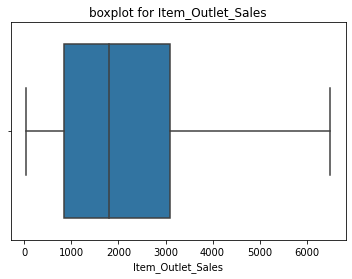

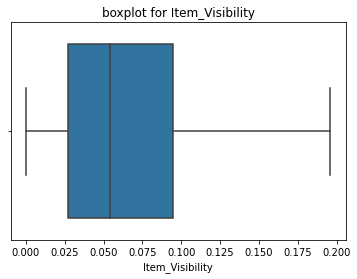

In [161]:
#Plotting the boxplots after replacing the outliers
plt.title('boxplot for Item_Outlet_Sales')
sns.boxplot(num_data_frame['Item_Outlet_Sales']);
plt.show()
plt.title('boxplot for Item_Visibility')
sns.boxplot(num_data_frame['Item_Visibility']);
plt.show()

In [162]:
num_data_frame.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [163]:
## Concatinating the categorical and numerical features.
combined_data_frame=pd.concat([cat_data_frame,num_data_frame],axis=1)

In [164]:
combined_data_frame.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,1437,4,11,5,2,0,3,9.30,0.016047,249.8092,1999,3735.1380
1,1145,3,7,3,2,2,0,5.92,0.019278,48.2692,2009,443.4228
2,1314,4,6,5,2,0,3,17.50,0.016760,141.6180,1999,2097.2700
3,1129,3,15,1,2,2,2,19.20,0.000000,182.0950,1998,732.3800
4,1147,4,13,8,0,2,3,8.93,0.000000,53.8614,1987,994.7052


In [196]:
combined_data_frame.shape

(8523, 12)

In [180]:
for cols in combined_data_frame.columns:
    print('{}: {}'.format(cols,combined_data_frame[cols].dtype))

Item_Identifier: int64
Item_Fat_Content: int64
Item_Type: int64
Outlet_Identifier: int64
Outlet_Size: int64
Outlet_Location_Type: int64
Outlet_Type: int64
Item_Weight: float64
Item_Visibility: float64
Item_MRP: float64
Outlet_Establishment_Year: int64
Item_Outlet_Sales: float64


In [181]:
combined_data_frame.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

## Feature selection 

In [175]:
x_final=combined_data_frame.drop(['Item_Outlet_Sales'],axis=1)
y_final=combined_data_frame['Item_Outlet_Sales']

In [177]:
y_final

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [184]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [198]:
model=SelectFromModel(Lasso(alpha=0.9,random_state=0))
model.fit(x_final,y_final)
features_selected=[]
for i,j in zip(x_final.columns,model.get_support()):
    if j==True:
        features_selected.append(i)
print('Number of features selected: ',len(features_selected))
print('Features selection: ',features_selected)

Number of features selected:  11
Features selection:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [199]:
#All features are selected

In [200]:
combined_data_frame.to_csv('final_input.csv',index=False)